### Import Necessary Libraries

In [1]:
%matplotlib inline

## Data Analysis
import numpy as np
import pandas as pd

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

## Missing Data Visualization
import missingno

### Load the Dataset

In [2]:
df = pd.read_csv('BankChurners.csv')
df = df.iloc[:,0:-2]                ### Remove the last two columns as the are unneccessary.
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
print(f"The Data has {df.shape[0]} rows and {df.shape[1]} columns")

The Data has 10127 rows and 21 columns


### Data Preprocessing

#### Missing Value Analysis

<AxesSubplot:>

<Figure size 1080x576 with 0 Axes>

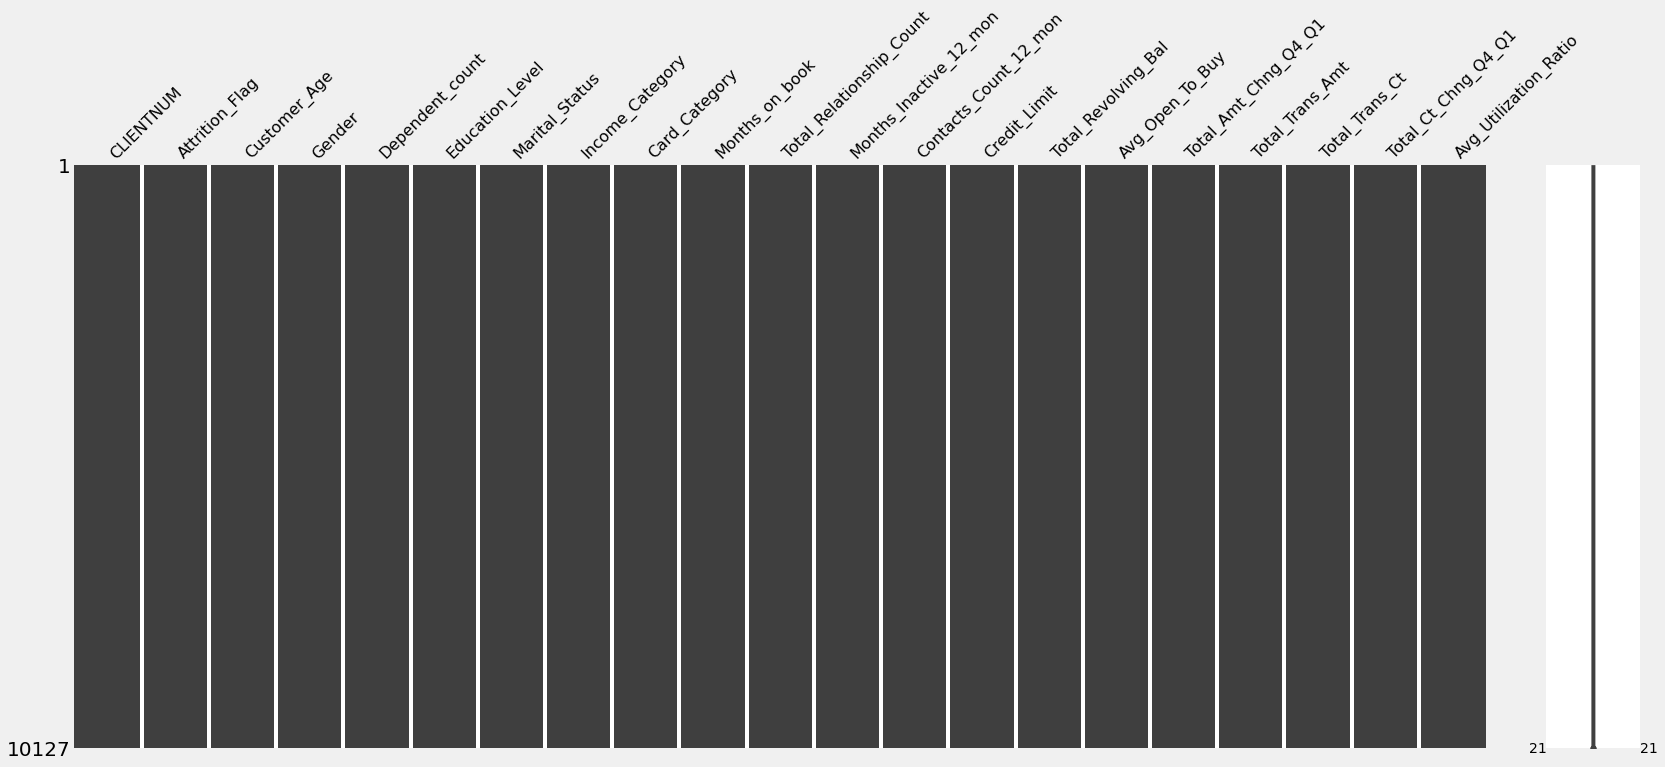

In [4]:
## Missing Values
plt.figure(figsize=(15,8))
missingno.matrix(df)

- Let's try a different method to understand the missing values much better.

In [5]:
### Different Approach
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- We can see here that there are no missing values in the dataset. Which is a good sign as we can now go ahead with the analysis.

#### Satistical Information

In [6]:
## Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
## Summary Statistics (For Categorical Data)
df.describe(include= 'object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [8]:
## Summary Statistics (For Numerical Data)
df.describe(exclude= 'object')

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### Understand the Data Types

In [9]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Exploratory Data Analysis

#### Exploring each Feature Individually (Univariate Analysis)

In [10]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##### FEATURE 1: Client Number

In [11]:
### Checking for Duplicates
df['CLIENTNUM'].duplicated().any()

False

- The 'CLIENTNUM' Column can be dropped as it doesn't play much role in future analysis.

##### FEATURE 2: Attrition_Flag (Churners) --> Target Variable

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


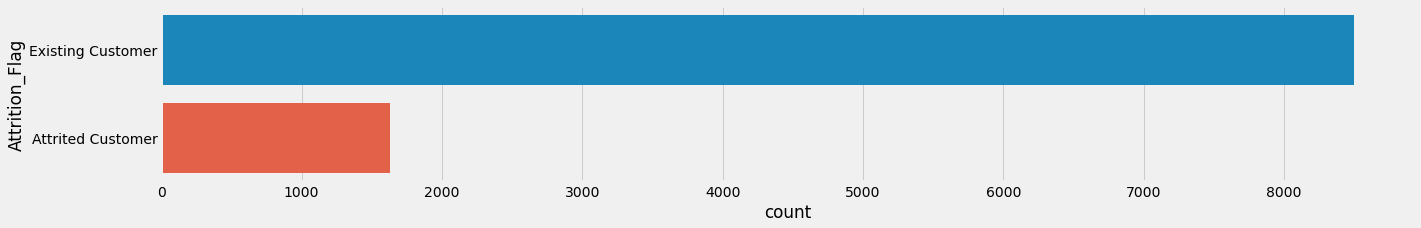

In [13]:
#### Understand the Data
plt.figure(figsize=(20,3))
sns.countplot(y= "Attrition_Flag", data= df)

print(df['Attrition_Flag'].value_counts())

> We can see here that the data is highly imbalanced. We will deal with that in the Feature Engineering section.

##### FEATURE 3: Customer Age

In [14]:
df['Customer_Age'].dtype

dtype('int64')

In [15]:
df['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

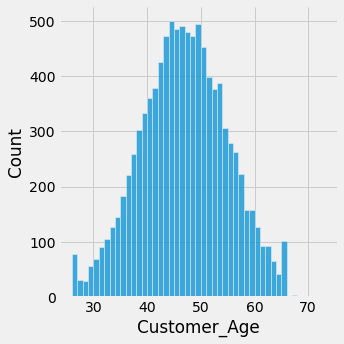

In [16]:
### Understanding the Distribution
sns.displot(x= "Customer_Age", data= df)

<AxesSubplot:xlabel='Customer_Age'>

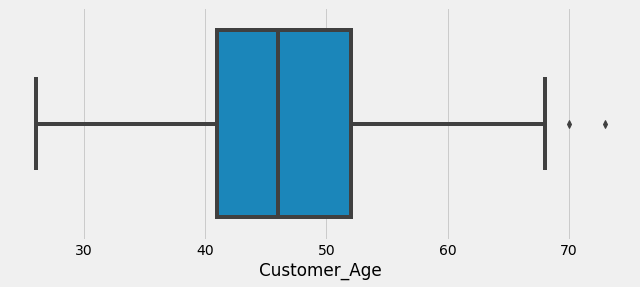

In [17]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Customer_Age", data= df)    

- Since the data distribution is Normal, we can use the Z-Score to treat the outliers in the data.

##### FEATURE 4: Gender

In [18]:
df['Gender'].dtype

dtype('O')

F    5358
M    4769
Name: Gender, dtype: int64


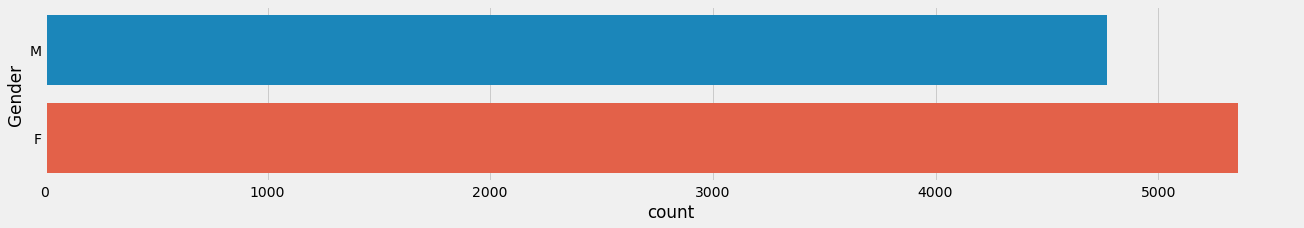

In [19]:
#### Countplot of the Data
plt.figure(figsize=(20,3))
sns.countplot(y= "Gender", data= df)

print(df['Gender'].value_counts())

##### FEATURE 5: Dependent Count

**DESCRIPTION:** Number of Dependents

In [20]:
df['Dependent_count'].dtype

dtype('int64')

In [21]:
df['Dependent_count'].unique()

array([3, 5, 4, 2, 0, 1])

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64


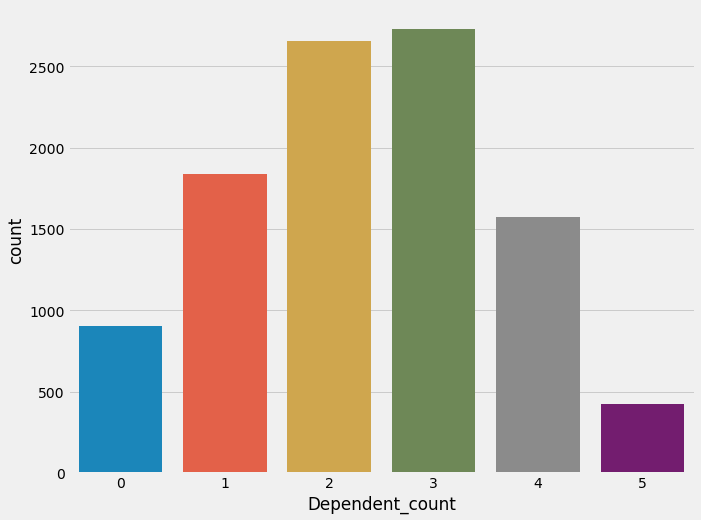

In [22]:
#### Data Distribution
plt.figure(figsize=(10,8))
sns.countplot(x= df["Dependent_count"])

print(df['Dependent_count'].value_counts())

- We can see that a majority of the clients have 2-3 Dependents. There are also a small number of Clients who have 5 people dependent.

##### FEATURE 6: Education Level

In [23]:
df['Education_Level'].dtype

dtype('O')

In [24]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

- Here we can consider the "Unknown" category as Missing Value in the Education Level. This probably can be dealt with by:
    1. Filling using the Median/Mode of the Education Level. (**MOST ACCURATE**)
    2. Comparing with the Age and Income of the Client.

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


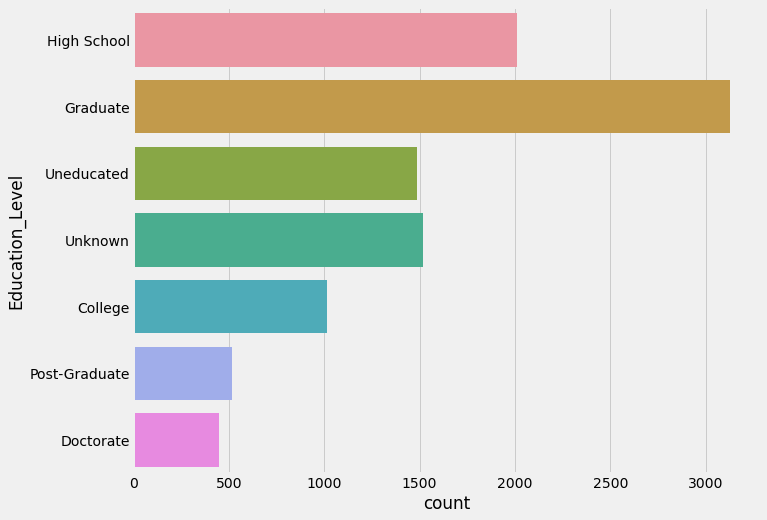

In [26]:
#### Countplot of Education Level
plt.figure(figsize=(10,8))
sns.countplot(y= df["Education_Level"])

print(df['Education_Level'].value_counts())

##### FEATURE 7: Marital Status

In [27]:
df["Marital_Status"].dtype

dtype('O')

In [28]:
## Unique Values
df["Marital_Status"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

<AxesSubplot:ylabel='Marital_Status'>

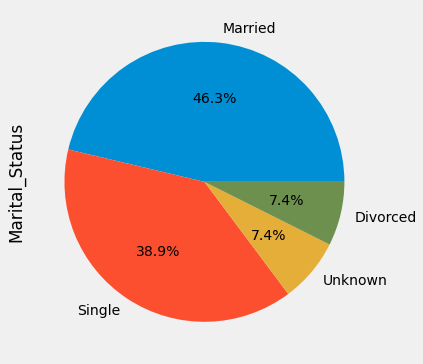

In [29]:
plt.figure(figsize=(6,6))
df["Marital_Status"].value_counts().plot(kind= 'pie', autopct= '%1.1f%%')

##### FEATURE 8: Income Category

In [30]:
df['Income_Category'].dtype

dtype('O')

In [31]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


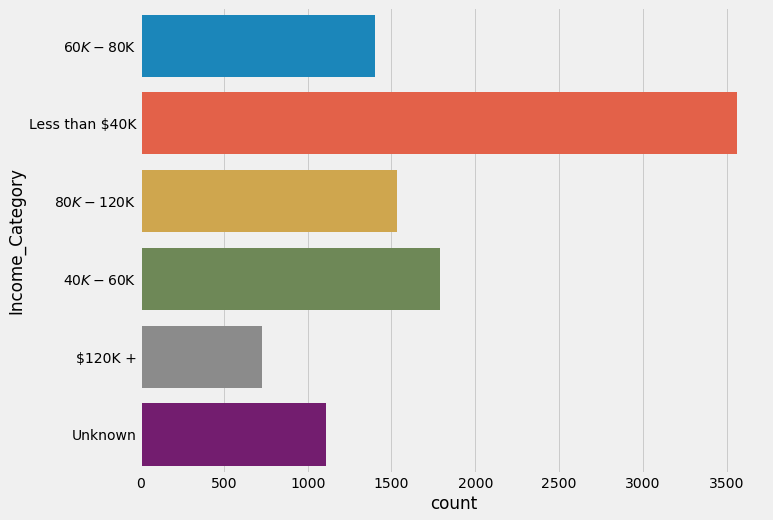

In [32]:
#### Countplot of Income Category
plt.figure(figsize=(10,8))
sns.countplot(y= df["Income_Category"])

print(df['Income_Category'].value_counts())

##### FEATURE 9: Card Category

In [33]:
df['Card_Category'].dtype

dtype('O')

In [34]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [35]:
## Install Plotly for better Visualization
# !pip install plotly

In [36]:
import plotly.graph_objects as go

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data= [go.Pie(labels= df['Card_Category'].unique(), values= df["Card_Category"].value_counts(), hole=.3)] )

fig.update_layout(autosize=False, width=500, height=500,
        margin=dict(l= 50, r= 50, b= 50, t= 50, pad=4),
        paper_bgcolor="White",
)

fig.show()

##### FEATURE 10: Months On Book

**DESCRIPTION:** Period of relationship with bank

In [37]:
df['Months_on_book'].dtype

dtype('int64')

In [38]:
df['Months_on_book'].describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

In [39]:
# df['Months_on_book']            # Try also with converting to Days. 

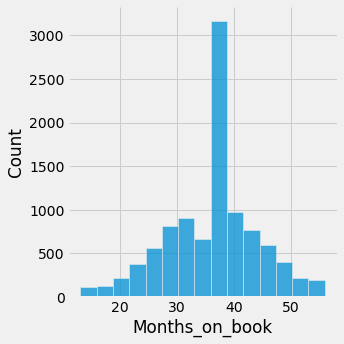

In [40]:
### Understanding the Distribution
sns.displot(x= "Months_on_book", data= df, bins= 15)

<AxesSubplot:xlabel='Months_on_book'>

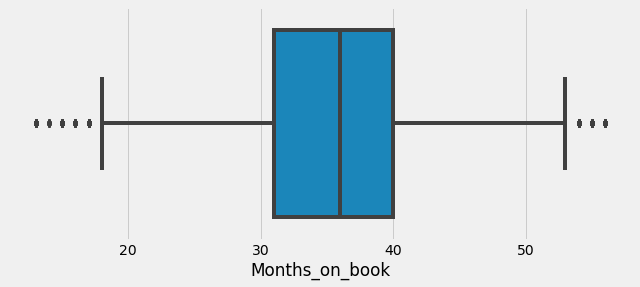

In [42]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Months_on_book", data= df)    

- Since the data distribution is Normal, we can use the Z-Score to treat the outliers in the data.

##### FEATURE 11: Total_Relationship_Count

**DESCRIPTION:** Total No. of Products held by the Customer

In [43]:
df['Total_Relationship_Count'].dtype

dtype('int64')

In [44]:
df['Total_Relationship_Count'].describe()

count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64

In [45]:
df['Total_Relationship_Count'].unique()

array([5, 6, 4, 3, 2, 1])

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

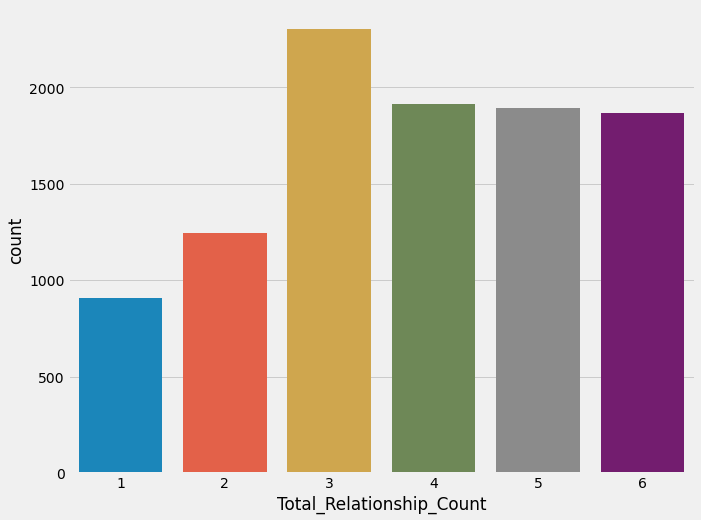

In [46]:
#### Data Distribution
plt.figure(figsize=(10,8))
sns.countplot(x= df["Total_Relationship_Count"])

> Here the Total No. of Products held by a majority of clients is 3.

##### FEATURE 12: Months Inactive

**DESCRIPTION:** No. of Months Inactive in the last 12 Months

In [48]:
df['Months_Inactive_12_mon'].dtype

dtype('int64')

In [49]:
df['Months_Inactive_12_mon'].describe()

count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Months_Inactive_12_mon, dtype: float64

In [50]:
df['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3, 6, 0, 5])

<AxesSubplot:xlabel='count', ylabel='Months_Inactive_12_mon'>

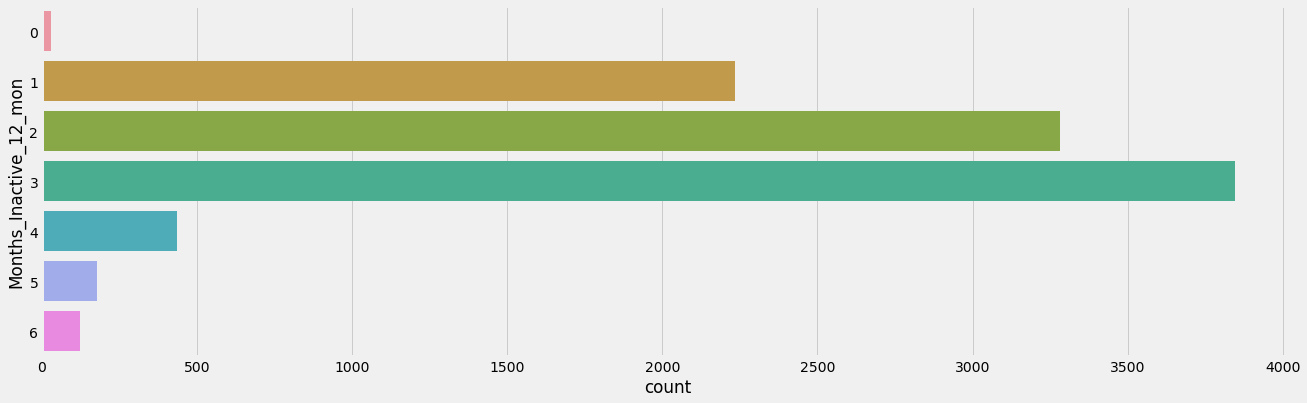

In [51]:
#### Data Distribution
plt.figure(figsize=(20,6))
sns.countplot(y= df["Months_Inactive_12_mon"])

- Here most of the clients have been inactive for 3 months. There are also a small number of Clients who have not been inactive for 12 months.

##### FEATURE 13: Contacts Count

**DESCRIPTION:** No. of Contacts in the last 12 Months

In [52]:
df['Contacts_Count_12_mon'].dtype

dtype('int64')

In [53]:
df['Contacts_Count_12_mon'].unique()

array([3, 2, 0, 1, 4, 5, 6])

<AxesSubplot:xlabel='count', ylabel='Contacts_Count_12_mon'>

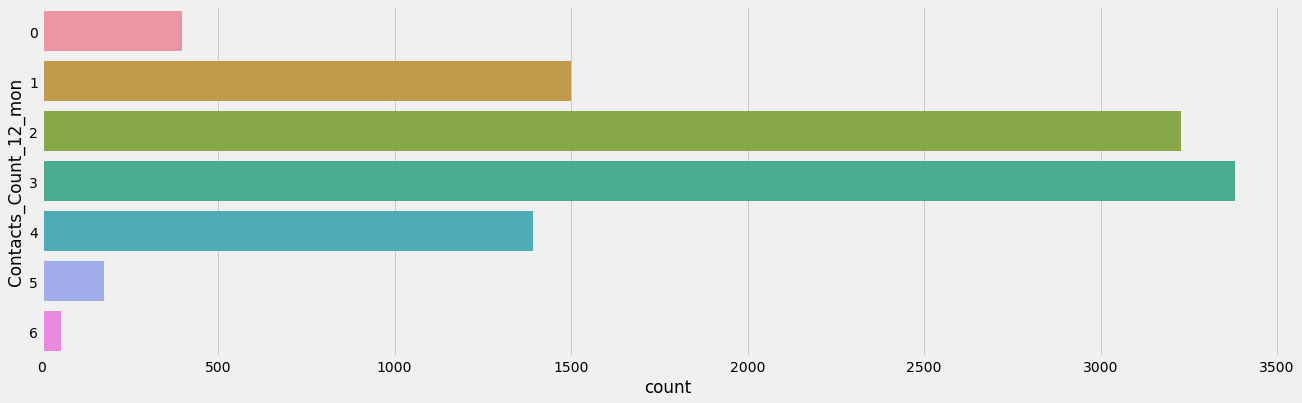

In [54]:
#### Data Distribution
plt.figure(figsize=(20,6))
sns.countplot(y= df["Contacts_Count_12_mon"])

- Here most of the clients have had 3 contacts in the last 12 months.

##### FEATURE 14: Credit Limit

**DESCRIPTION:** Credit Limit on the Credit Card

In [56]:
df["Credit_Limit"].dtype

dtype('float64')

In [59]:
df["Credit_Limit"].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

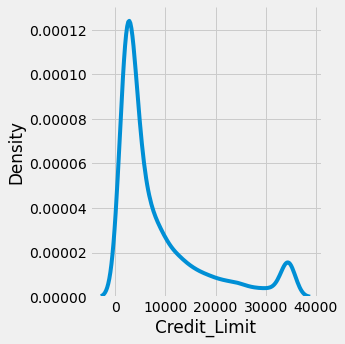

In [57]:
### Understanding the Distribution

sns.displot(data=df, x="Credit_Limit", kind="kde")

<AxesSubplot:xlabel='Credit_Limit'>

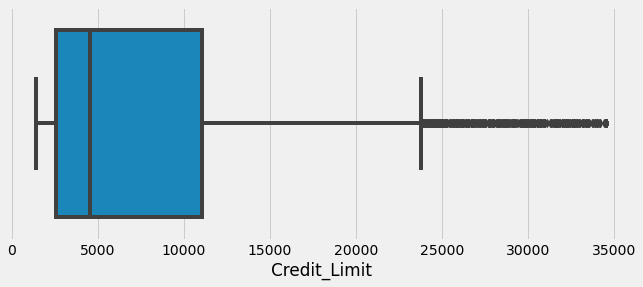

In [58]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Credit_Limit", data= df)    

- Since the data distribution is not Normal, we can use the IQR Method to treat the outliers in the data.

##### FEATURE 15: Total Revolving Balance

**DESCRIPTION:** Total Revolving Balance on the Credit Card

In [60]:
df['Total_Revolving_Bal'].dtype

dtype('int64')

In [61]:
df['Total_Revolving_Bal'].describe()

count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

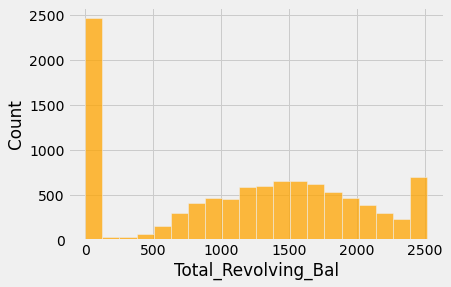

In [62]:
### Understanding the Distribution

sns.histplot(data=df, x="Total_Revolving_Bal", color= "orange")

<AxesSubplot:xlabel='Total_Revolving_Bal'>

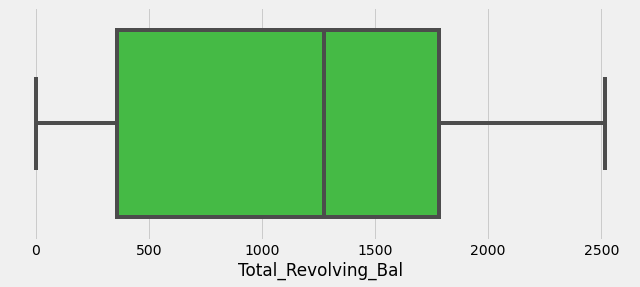

In [63]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Total_Revolving_Bal", data= df, color= "limegreen")    

##### FEATURE 16: Avg_Open_To_Buy

**DESCRIPTION:** Open to Buy Credit Line (Average of last 12 months)

In [68]:
df['Avg_Open_To_Buy'].dtype

dtype('float64')

In [69]:
df['Avg_Open_To_Buy'].describe()

count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Count'>

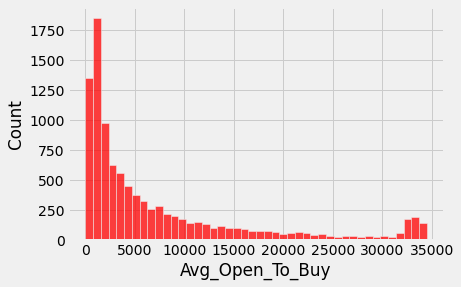

In [70]:
### Understanding the Distribution

sns.histplot(data=df, x="Avg_Open_To_Buy", color= "red")

<AxesSubplot:xlabel='Avg_Open_To_Buy'>

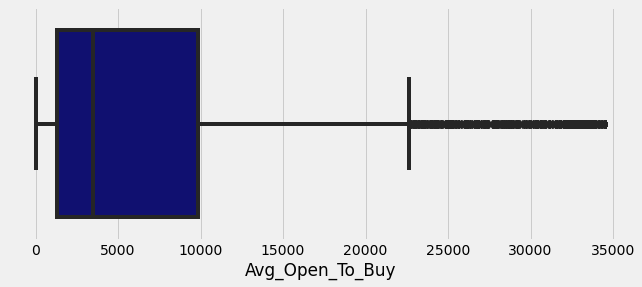

In [71]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Avg_Open_To_Buy", data= df, color= "navy")    

##### FEATURE 17: Total_Amt_Chng_Q4_Q1

**DESCRIPTION:** Change in Transaction Amount (Q4 over Q1)

In [72]:
df['Total_Amt_Chng_Q4_Q1']

0        1.335
1        1.541
2        2.594
3        1.405
4        2.175
         ...  
10122    0.703
10123    0.804
10124    0.819
10125    0.535
10126    0.703
Name: Total_Amt_Chng_Q4_Q1, Length: 10127, dtype: float64

In [73]:
df['Total_Amt_Chng_Q4_Q1'].describe()

count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

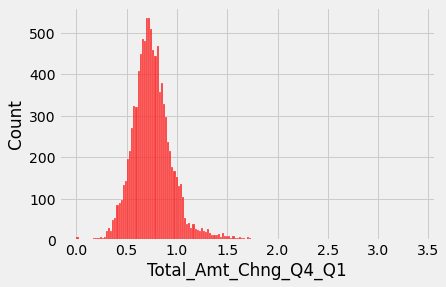

In [74]:
### Understanding the Distribution

sns.histplot(data=df, x="Total_Amt_Chng_Q4_Q1", color= "red")

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1'>

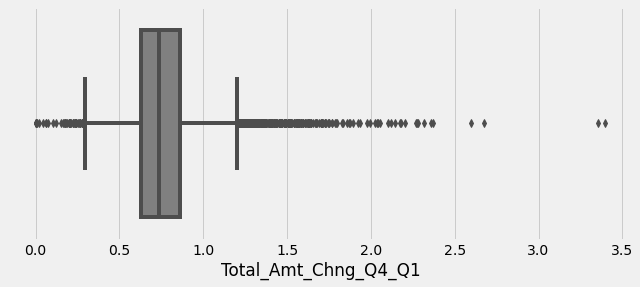

In [75]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Total_Amt_Chng_Q4_Q1", data= df, color= "gray")    

##### FEATURE 18: Total_Trans_Amt

**DESCRIPTION:** Total Transaction Amount (Last 12 months)

In [76]:
df['Total_Trans_Amt'].dtype

dtype('int64')

In [77]:
df['Total_Trans_Amt'].describe()

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

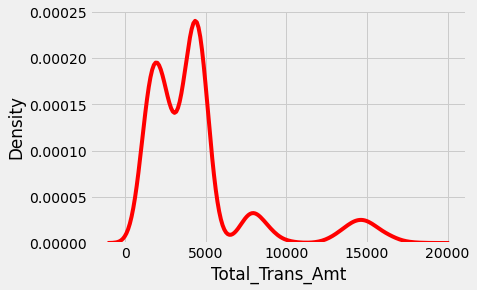

In [78]:
### Understanding the Distribution

sns.kdeplot(data=df, x="Total_Trans_Amt", color= "red")

<AxesSubplot:xlabel='Total_Trans_Amt'>

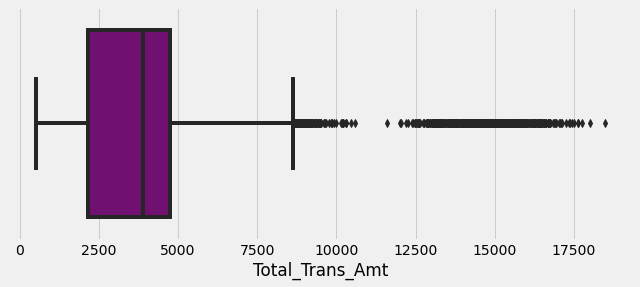

In [79]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Total_Trans_Amt", data= df, color= "purple")    

##### FEATURE 19: Total_Trans_Ct

**DESCRIPTION:** Total Transaction Count (Last 12 months)

In [81]:
df['Total_Trans_Ct'].dtype

dtype('int64')

In [82]:
df['Total_Trans_Ct'].describe()

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

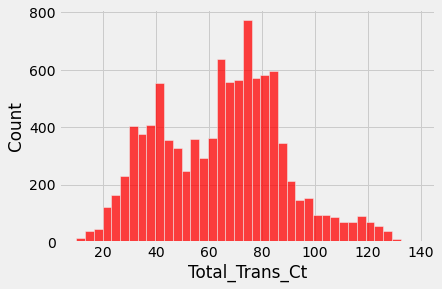

In [83]:
### Understanding the Distribution

sns.histplot(data=df, x="Total_Trans_Ct", color= "red")

<AxesSubplot:xlabel='Total_Trans_Ct'>

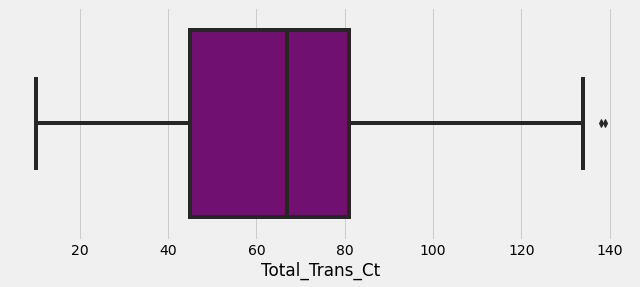

In [84]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Total_Trans_Ct", data= df, color= "purple")    

##### FEATURE 20: Total_Ct_Chng_Q4_Q1

**DESCRIPTION:** Change in Transaction Count (Q4 over Q1)

In [96]:
df['Total_Ct_Chng_Q4_Q1'].dtype

dtype('float64')

In [88]:
df['Total_Ct_Chng_Q4_Q1'].describe()

count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

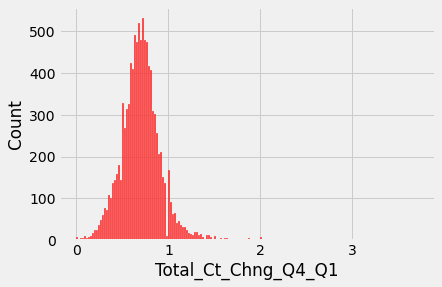

In [89]:
### Understanding the Distribution

sns.histplot(data=df, x="Total_Ct_Chng_Q4_Q1", color= "red")

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1'>

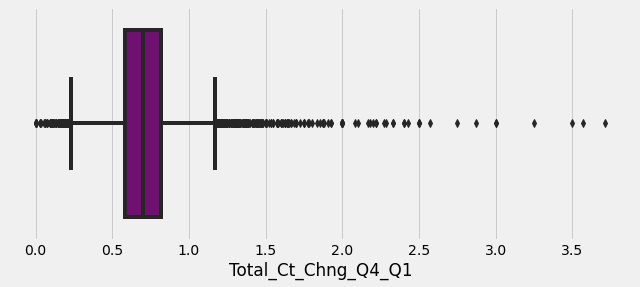

In [90]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Total_Ct_Chng_Q4_Q1", data= df, color= "purple")    

##### FEATURE 21: Avg_Utilization_Ratio

**DESCRIPTION:** Average Card Utilization Ratio
- Higher the value greater the probabbitlty of repayment

In [92]:
df['Avg_Utilization_Ratio'].dtype

dtype('float64')

In [93]:
df['Avg_Utilization_Ratio'].describe()

count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

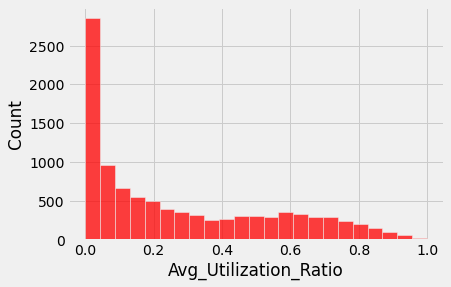

In [94]:
### Understanding the Distribution

sns.histplot(data=df, x="Avg_Utilization_Ratio", color= "red")

<AxesSubplot:xlabel='Avg_Utilization_Ratio'>

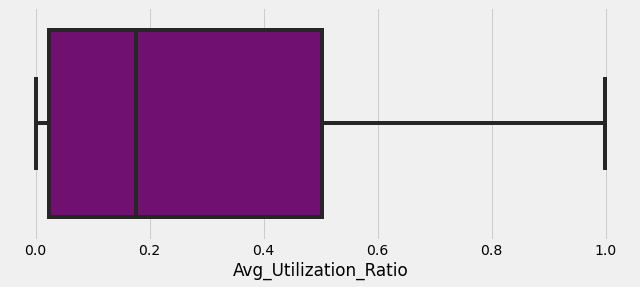

In [95]:
### Checking for Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x= "Avg_Utilization_Ratio", data= df, color= "purple")    

#### Bivariate Analysis

<strong>QUESTION 1: Analyze the Churners among the Genders.</strong>

<AxesSubplot:xlabel='Gender', ylabel='count'>

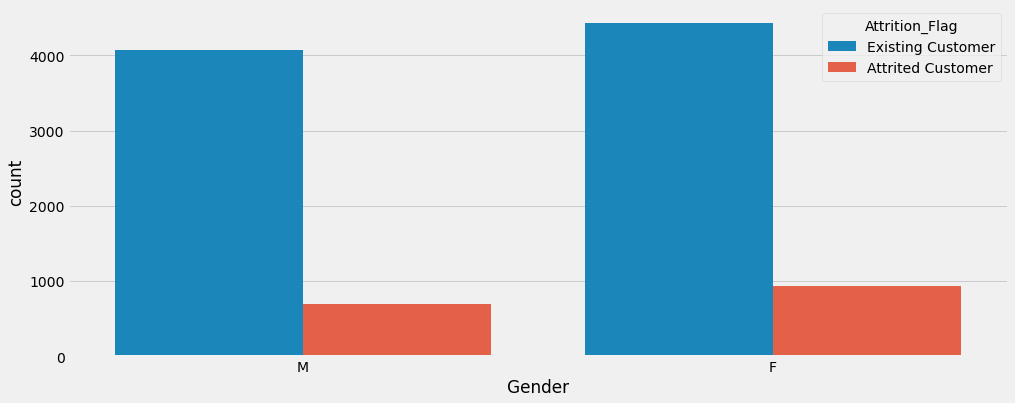

In [97]:
plt.figure(figsize= (15,6))
sns.countplot(x= 'Gender', hue= 'Attrition_Flag', data= df)

In [117]:
### Percentage of Male and Female Churners

pd.pivot_table(data= df, values= 'CLIENTNUM', index= ['Gender', 'Attrition_Flag'], aggfunc= 'count')

CLIENTNUM
Gender Attrition_Flag              
F      Attrited Customer        930
       Existing Customer       4428
M      Attrited Customer        697
       Existing Customer       4072

> We can see that the more number of Churners are there among the Females.

<strong>QUESTION 2: Relationship between Gender and The Number of Dependents</strong>

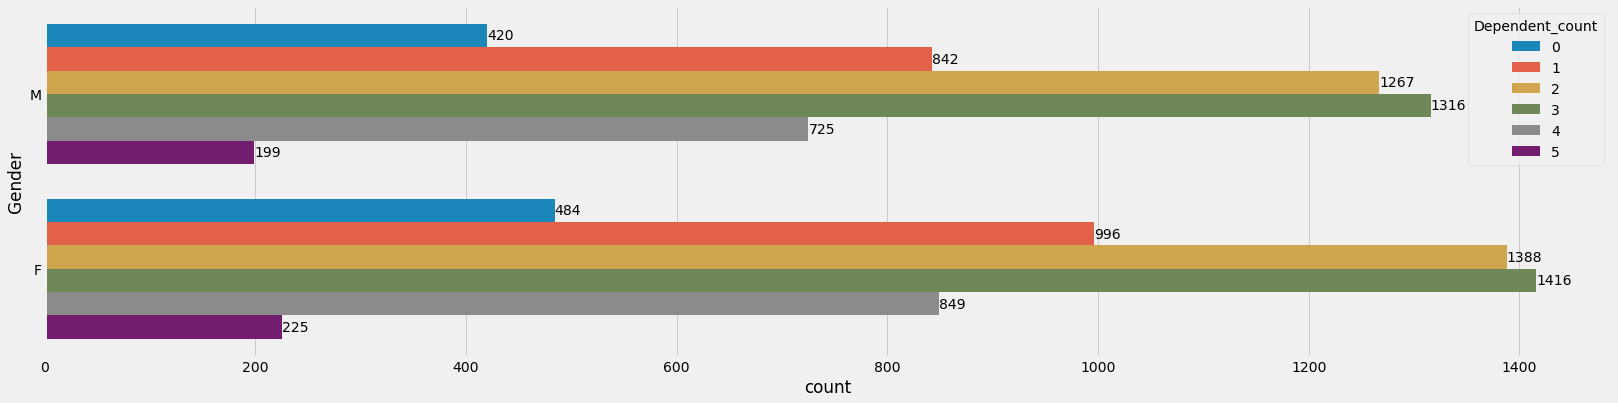

In [118]:
plt.figure(figsize= (25,6))
ax = sns.countplot(y= 'Gender', hue= 'Dependent_count', data= df, )
for i in range(6):
    ax.bar_label(ax.containers[i])

> Here we can see that Female Gender has the most Number of Dependents.

<strong>QUESTION 3: Analysis of Marrige Status and Churning</strong>

In [119]:
## Creating a Pivot Table
pd.pivot_table(data= df, values= 'CLIENTNUM', index= ['Marital_Status', 'Attrition_Flag'], aggfunc= 'count')

CLIENTNUM
Marital_Status Attrition_Flag              
Divorced       Attrited Customer        121
               Existing Customer        627
Married        Attrited Customer        709
               Existing Customer       3978
Single         Attrited Customer        668
               Existing Customer       3275
Unknown        Attrited Customer        129
               Existing Customer        620

> From here we can  concude that more number of churners are observed among the married group.

<strong>QUESTION 4: How the cards assigned are different for Different Income Categories</strong>

In [120]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [121]:
table = pd.pivot_table(data= df, values= 'CLIENTNUM', index= ['Card_Category', 'Income_Category'], aggfunc= 'count')
table.reset_index(inplace= True)
table.columns = ['Card_Category', 'Income_Category', 'Count']


import plotly.express as px

fig = px.bar(table, x= "Card_Category", y= "Count", color="Income_Category")
fig.show()

> INFERENCE:
>    - The Blue and the Silver cards are held by clients with an income of Less than $40K.
>    - The Gold card is held by clients with an income of $60K to $80K.
>    - The Platinum card is held by clients with an income the is Unknown.

<strong>QUESTION 5: Relationahip of Education and the Income Category</strong>

<AxesSubplot:xlabel='count', ylabel='Education_Level'>

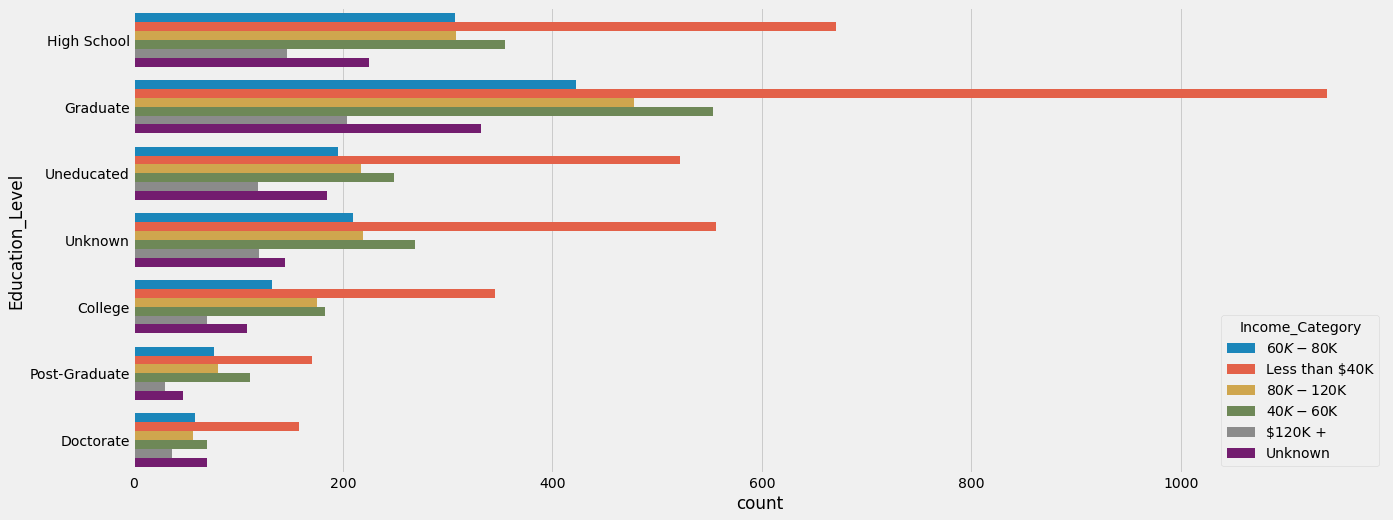

In [122]:
plt.figure(figsize= (20,8))
sns.countplot(y= 'Education_Level', hue= 'Income_Category', data= df)

In [123]:
table = pd.pivot_table(data= df, values= 'CLIENTNUM', index= ['Income_Category', 'Education_Level'], aggfunc= 'count')
table.query('Education_Level == ["Uneducated", "Unknown"]')

CLIENTNUM
Income_Category Education_Level           
$120K +         Uneducated             119
                Unknown                120
$40K - $60K     Uneducated             249
                Unknown                269
$60K - $80K     Uneducated             195
                Unknown                210
$80K - $120K    Uneducated             217
                Unknown                219
Less than $40K  Uneducated             522
                Unknown                556
Unknown         Uneducated             185
                Unknown                145

- Looking at the plot and the query we can see that the "Unknown" category has an almost similar pattern as the "Uneducated" category. This might be useful to fill the missing values in the Feature Engineering Section.

<strong>QUESTION 6: Total Clients grouped among the Marital Status for each Dependent Count</strong>

In [124]:
pd.pivot_table(data= df, values= ['CLIENTNUM', "Total_Revolving_Bal"], index= ['Dependent_count', 'Marital_Status'], 
                aggfunc= {'CLIENTNUM': 'count', 'Total_Revolving_Bal': np.sum})

CLIENTNUM  Total_Revolving_Bal
Dependent_count Marital_Status                                
0               Divorced               75                83205
                Married               387               475300
                Single                399               428178
                Unknown                43                50046
1               Divorced              105               109623
                Married               832              1063040
                Single                770               875288
                Unknown               131               156115
2               Divorced              204               233657
                Married              1284              1542872
                Single               1003              1099093
                Unknown               164               179820
3               Divorced              215               258538
                Married              1251              1447641
                Single               1027              1155453
                Unknown               239               278910
4               Divorced              125               153603
                Married               727               836947
                Single                587               686056
                Unknown               135               155518
5               Divorced               24                26048
                Married               206               245306
                Single                157               188816
                Unknown                37                46745

- Here based on the pivot table we can conclude that the Unknown Category can be filled using 2 methods:
    1. Filling using the Mode of each Marital Status. 
    2. Fill using the closest Revolving Balance for Clients of each Category. (**LIKELY ACCURATE**)

#### Multivariate Analysis

- *Try with sns.pairplot() --> This will help us to understand the relationship between the features (It will basically give us an idea about the correlation between the features).*

<strong>QUESTION 1: The Total Number of Products held by Clients of each Income and Card Category</strong>

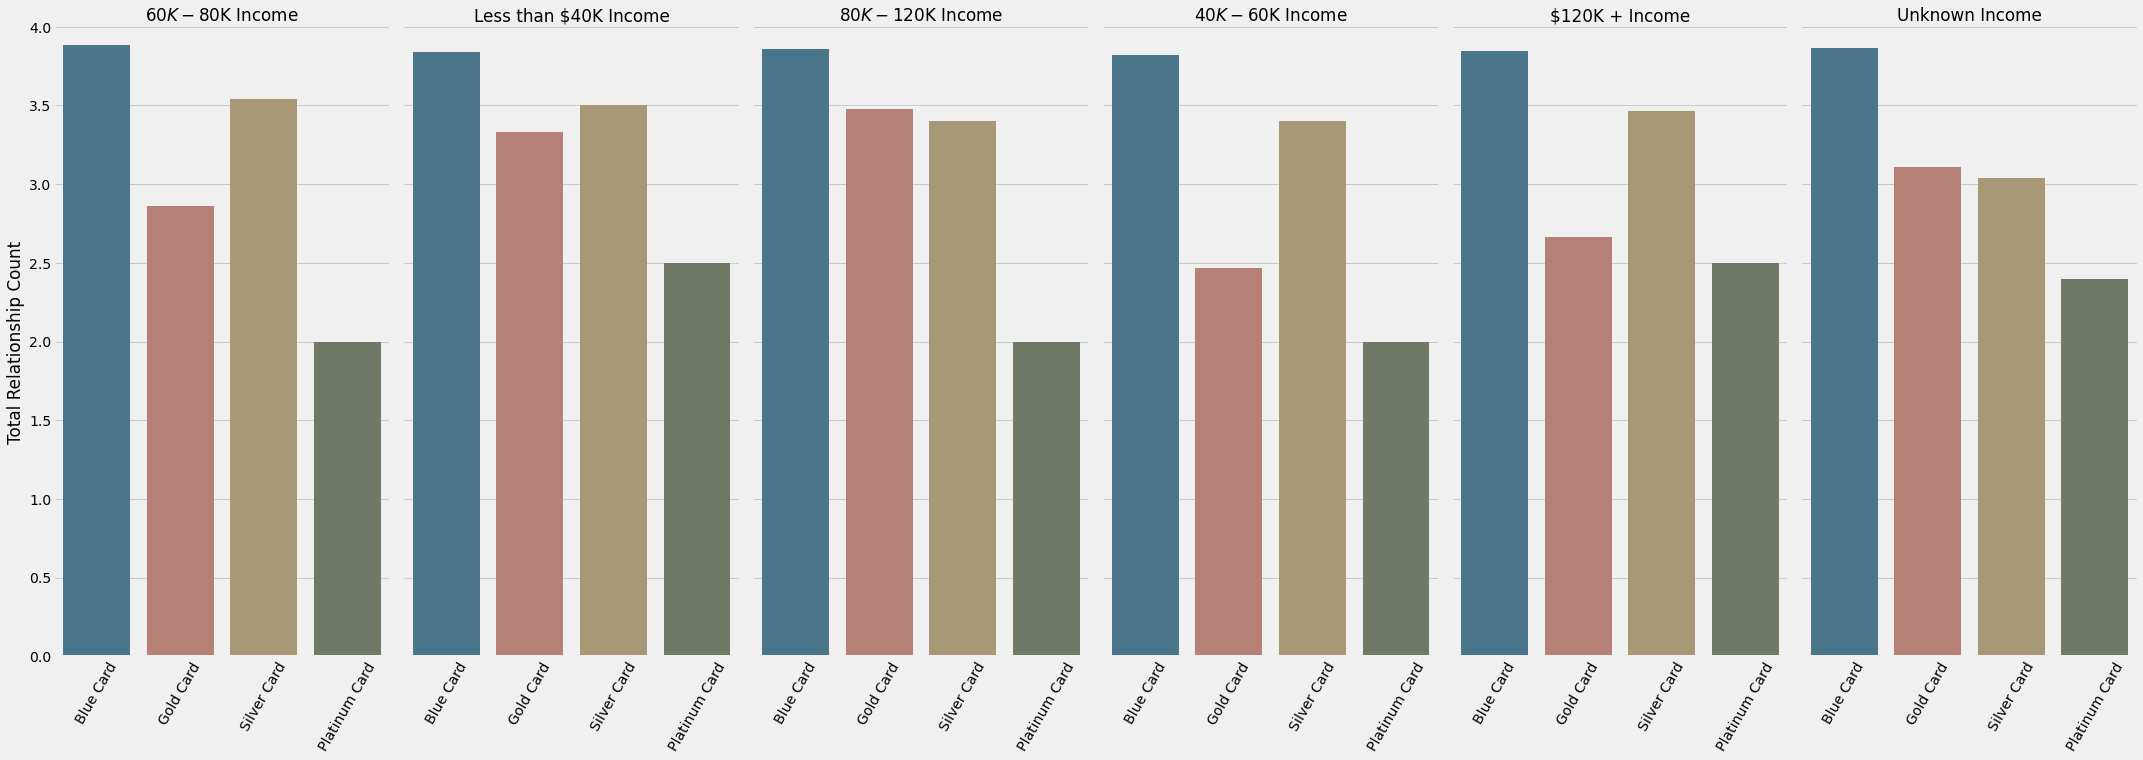

In [125]:
g = sns.catplot(x= "Card_Category", y= "Total_Relationship_Count", col= "Income_Category", data= df, 
            kind="bar", height=10, aspect=.5, ci=None, saturation=.3)

(g.set_axis_labels("", "Total Relationship Count").set_xticklabels(["Blue Card", "Gold Card", "Silver Card", "Platinum Card"], rotation= 60)
  .set_titles("{col_name} Income").set(ylim=(0, 4)).despine(left=True))

> Here it can be noted that for all the Income Categories there are a lot of Blue Card Clients who hold a lot of products.

<AxesSubplot:>

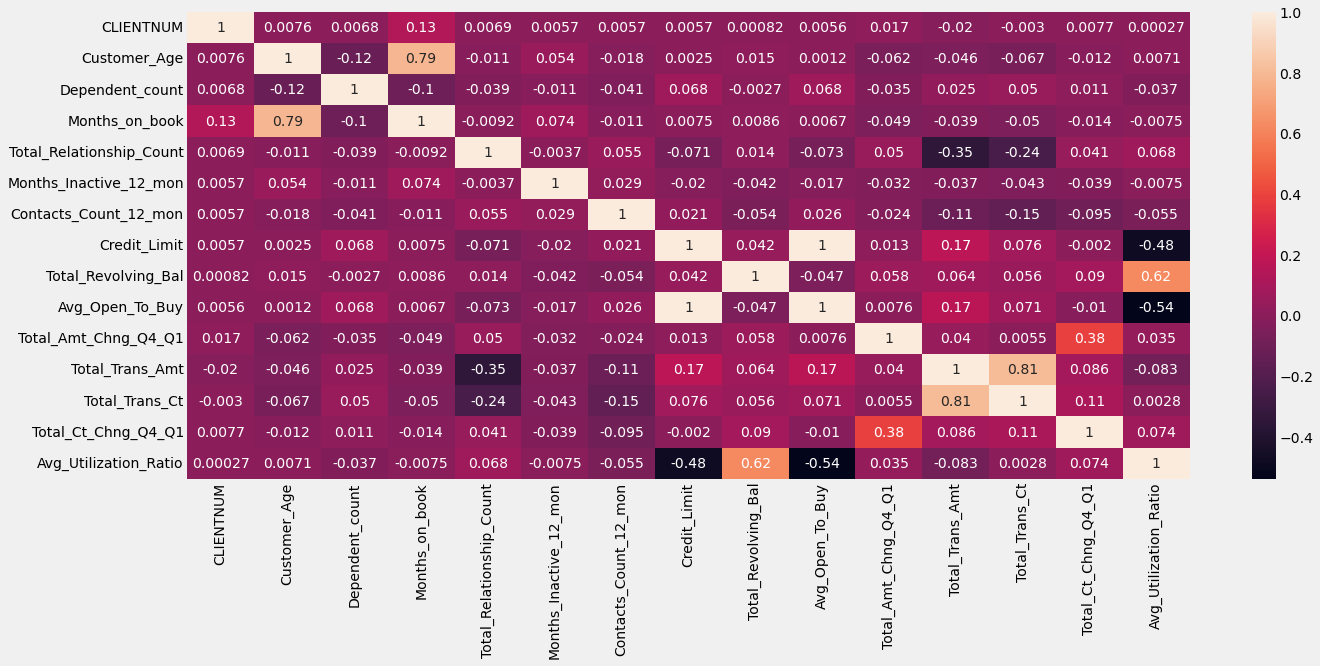

In [126]:
plt.figure(figsize= (20,8))
sns.heatmap(df.corr(), annot= True)